In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
c = pd.read_csv("Cleavland.csv", names=columns, na_values="?", sep=",",header=None)
s = pd.read_csv("Switzerland.csv",names=columns, na_values="?", sep=",",header=None)
h = pd.read_csv("hung.csv",names=columns, na_values="?", sep=",",header=None)

In [3]:
df_raw = pd.concat([c, s, h])
df_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


**Data Cleaning**

In [4]:
df_raw.shape

(720, 14)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  717 non-null    float64
 4   chol      697 non-null    float64
 5   fbs       637 non-null    float64
 6   restecg   718 non-null    float64
 7   thalach   718 non-null    float64
 8   exang     718 non-null    float64
 9   oldpeak   714 non-null    float64
 10  slope     513 non-null    float64
 11  ca        307 non-null    float64
 12  thal      400 non-null    float64
 13  num       720 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 84.4 KB


In [6]:
df_raw.isnull().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [7]:
df_raw['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  95.,  nan,  80., 185.,  98.,
       190., 113.,  92.])

In [8]:
for col in df_raw.columns:
  print(col, df_raw[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 32. 36. 72. 73. 28. 30. 31. 33.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  95.  nan  80. 185.  98. 190.
 113.  92.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 

In [9]:
df_raw['trestbps'].fillna(df_raw['trestbps'].mean(),inplace=True)
df_raw['chol'].fillna(df_raw['chol'].mean(),inplace=True)
df_raw['fbs'].fillna(df_raw['fbs'].mode()[0],inplace=True)
df_raw['restecg'].fillna(df_raw['restecg'].mode()[0],inplace=True)
df_raw['thalach'].fillna(df_raw['thalach'].mode()[0],inplace=True)
df_raw['exang'].fillna(df_raw['exang'].mode()[0],inplace=True)
df_raw['oldpeak'].fillna(df_raw['oldpeak'].mode()[0],inplace=True)
df_raw['slope'].fillna(df_raw['slope'].mode()[0],inplace=True)
df_raw['ca'].fillna(df_raw['ca'].mode()[0],inplace=True)
df_raw['thal'].fillna(df_raw['thal'].mode()[0],inplace=True)

In [10]:
df_raw.isnull().sum().sum()

0

**Removing Outlier**

In [11]:
df_raw.shape

(720, 14)

In [12]:
def outlier_remover(data,threshold=3):
  zscore=((data-data.mean())/data.std())
  out = zscore > 3
  data = data[~out.any(axis=1)]

  return data
df_clean = outlier_remover(df_raw)

In [13]:
df_clean.shape

(623, 14)

**Plotting the Graphs**
1. Histogram

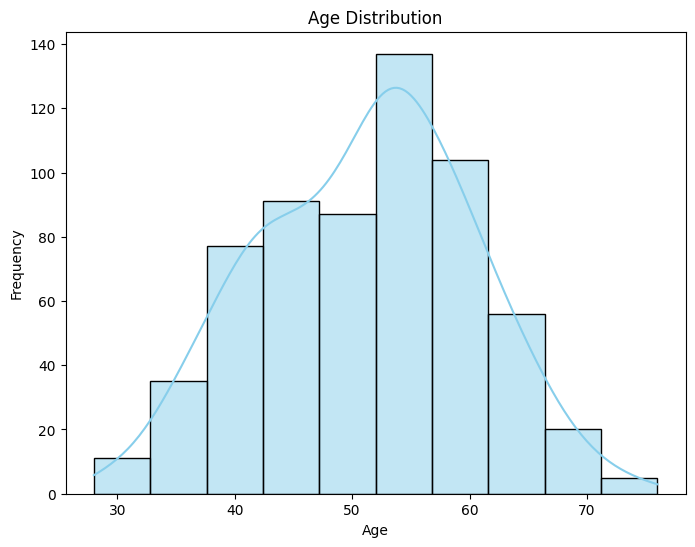

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df_clean['age'],kde=True, bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

2. Dot Plots

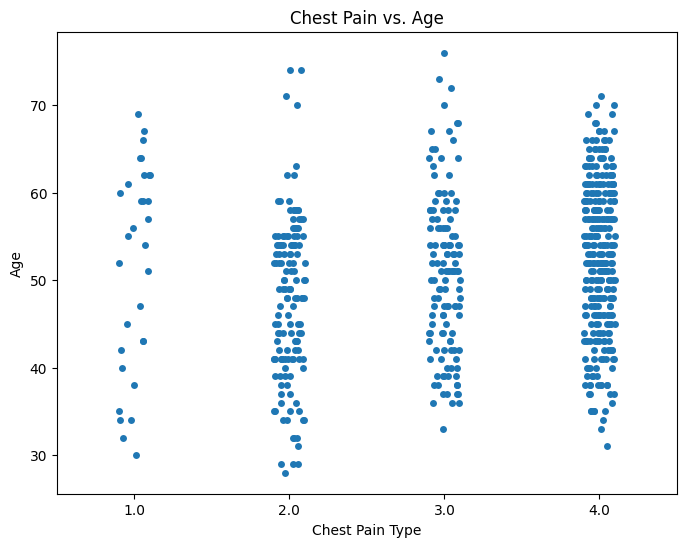

In [15]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='cp', y='age', data=df_clean, jitter=True)
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Chest Pain vs. Age')
plt.show()

3. Bar Plot

<ipython-input-25-c8ebd5d6906b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df_clean, palette='viridis')


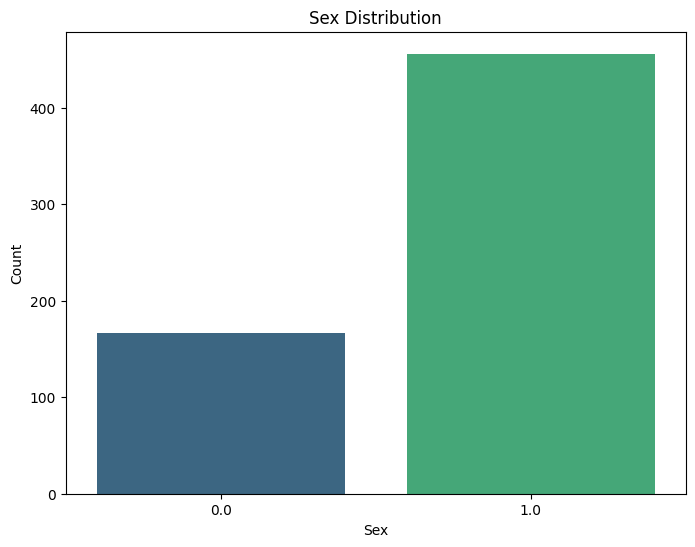

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df_clean, palette='viridis')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")
plt.show()

4. Scatter Plot


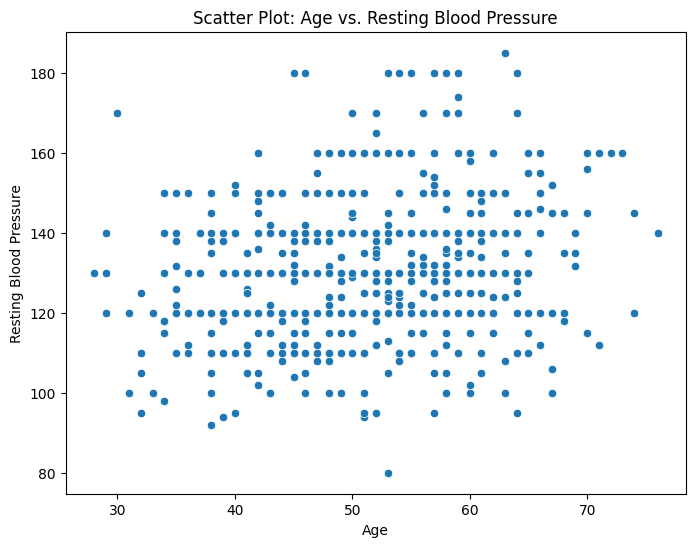

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='trestbps', data=df_clean)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Scatter Plot: Age vs. Resting Blood Pressure')
plt.show()

5. Pie Chart

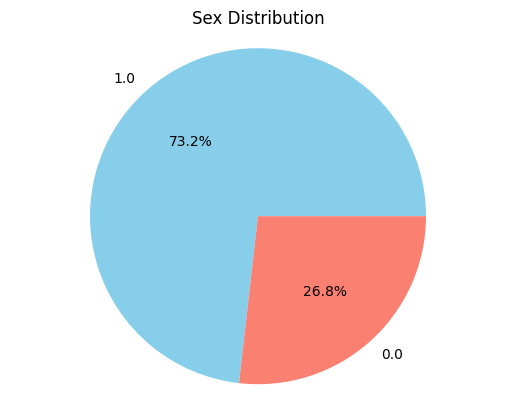

In [28]:
sex_counts = df_clean['sex'].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Sex Distribution')
plt.axis('equal')
plt.show()

6. Line Chart

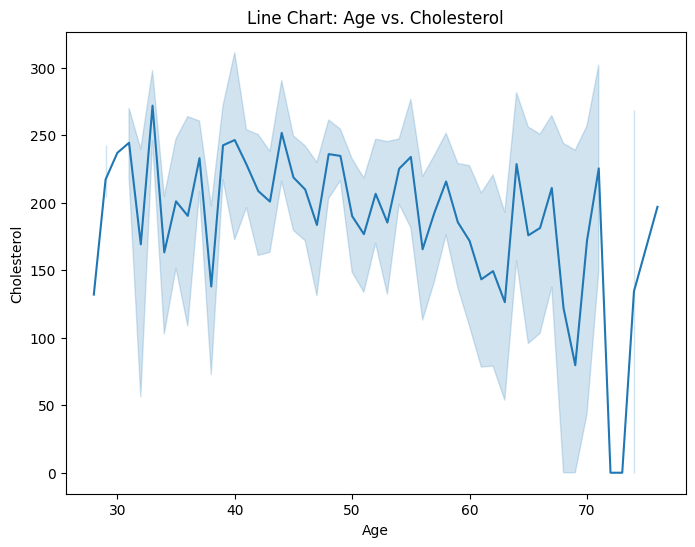

In [41]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='chol', data=df_clean)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Line Chart: Age vs. Cholesterol')
plt.show()


7. Box Plot

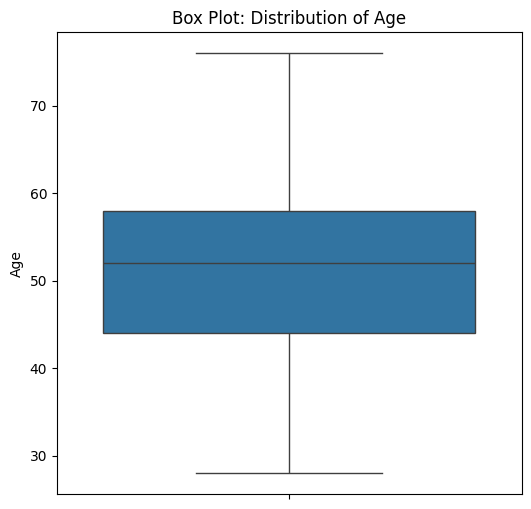

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='age', data=df_clean)
plt.ylabel('Age')
plt.title('Box Plot: Distribution of Age')
plt.show()

8. Add histogram and Scatter plot to box plot

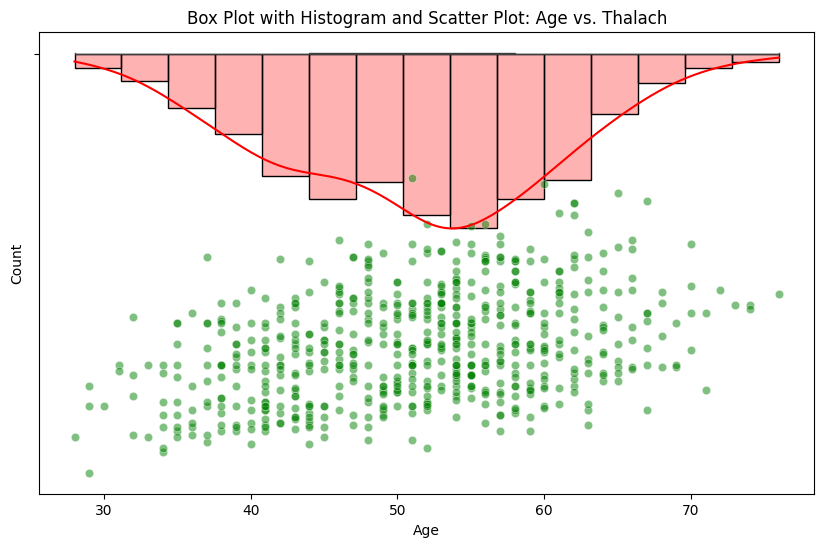

In [34]:
# Create a subplot with histogram, scatter plot, and box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df_clean)
sns.histplot(x='age', data=df_clean, kde=True, color='red', alpha=0.3)
sns.scatterplot(x='age', y='thalach', data=df_clean, color='green', alpha=0.5)
plt.xlabel('Age')
plt.title('Box Plot with Histogram and Scatter Plot: Age vs. Thalach')
plt.show()


9. Add Box Plot to Scatterplot

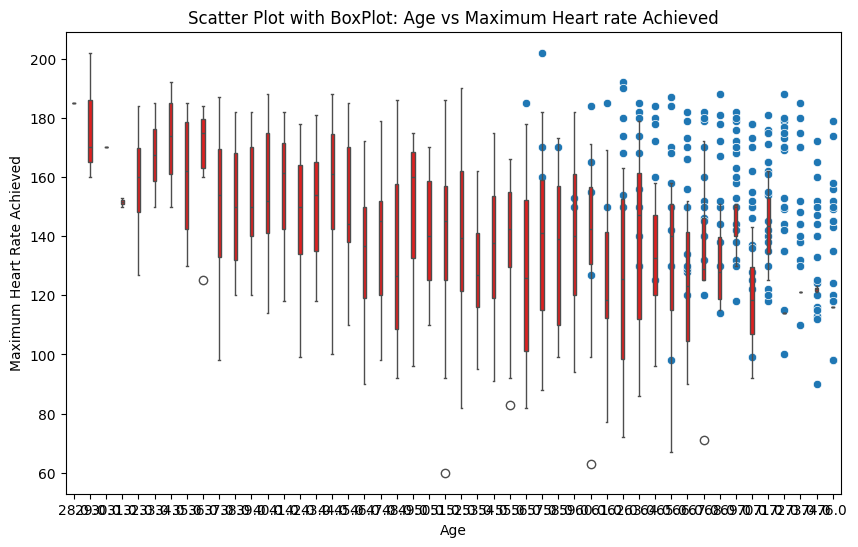

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='thalach',data=df_clean)
sns.boxplot(x='age',y='thalach',data=df_clean, width=0.2, color='red', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title("Scatter Plot with BoxPlot: Age vs Maximum Heart rate Achieved")
plt.show()